---
title: 'Walkthroughs and Exercises for *Machine Learning for Data Analytics with Python*'  
author: "Dr. Chester Ismay"  
format:
  html:
    toc: true
    toc-floating: true 
engine: knitr  
---

In [1]:
#| include: false
import warnings
warnings.filterwarnings("ignore", message="resource_tracker")

In [2]:
#| include: false
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option("display.width", 100)         # total width of console output

# Display all outputs from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Intro: Getting Started with Machine Learning for Data-Driven Decisions

## Walkthrough #1: Setting Up the Python Environment for ML

If you haven't already installed Python, Jupyter, and the necessary packages, there are instructions on the course repo in the README to do so [here](https://github.com/ismayc/oreilly-data-analysis-with-python/blob/main/README.md). 

If you aren't able to do this on your machine, you may want to check out [Google Colab](https://colab.research.google.com/). It's a free service that allows you to run Jupyter notebooks in the cloud. 

<!--
Alternatively, I've set up some temporary notebooks on Binder [here](https://mybinder.org/v2/gh/ismayc/oreilly-fundamentals-of-statistics-with-python/main?urlpath=%2Fdoc%2Ftree%2Fexercises.ipynb) that you can work with online as well.
-->

## Exercise #1: Setting Up the Python Environment

By completing this exercise, you will be able to  
- Import necessary Python packages  
- Check for successful package loading  


Follow the instructions above in Walkthrough #1 to check for correct installation 
of necessary packages. We'll wait a few minutes to make sure as many of you are
set up as possible. Please give a thumbs up in the pulse check if you are ready
to move on.

---

# Module 1: Data Understanding and Preprocessing for Machine Learning

## Walkthrough #2: Exploring and Preprocessing Data with Pandas & Seaborn

### Load and Inspect a Dataset Using Pandas

In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('telco-customer-churn.csv')

# Add in 6% of missing values to MonthlyCharges column
np.random.seed(42)
missing_indices = np.random.choice(df.index, size=int(len(df) * 0.06), replace=False)
df.loc[missing_indices, 'MonthlyCharges'] = np.nan

In [4]:
# Encode service columns as binary
service_cols = [
    'PhoneService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in service_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0}).astype(int)

df['ServiceCount'] = df[service_cols].sum(axis=1)

# Add Internet score
df['InternetScore'] = df['InternetService'].map({'Fiber optic': 40, 'DSL': 20, 'No': 0})

# Stronger functional link: tie engagement score directly to MonthlyCharges logic
# Higher charges → almost always due to more services, tenure, and Internet type
np.random.seed(42)
df['AvgServiceUsageScore'] = (
    df['MonthlyCharges'] * 0.05  # **direct linear dependence**
    + df['ServiceCount'] * 2     # services still matter slightly
    + df['InternetScore'] * 0.3  # Internet type adds a small weight
    + np.random.normal(0, 4, len(df))  # tiny noise
).clip(0, 100)

# Add in 6% of missing values to MonthlyCharges column (plus 3% to AvgServiceUsageScore)
missing_indices = np.random.choice(df.index, size=int(len(df) * 0.03), replace=False)
df.loc[missing_indices, 'AvgServiceUsageScore'] = np.nan

In [5]:
# Move 'Churn' column to the end
churn_col = df.pop('Churn')  # removes 'Churn' and stores it temporarily
df['Churn'] = churn_col      # re-inserts it at the end

# Inspect data structure
df
df.info()

# Check for missing values
df.isnull().sum()

# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ServiceCount,InternetScore,AvgServiceUsageScore,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,1,20,11.479357,No
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,3,20,14.294443,No
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,3,20,17.283254,Yes
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,3,20,20.207119,No
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,40,16.598387,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,1,Yes,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,6,20,13.096891,No
7039,2234-XADUH,Female,0,Yes,Yes,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,5,40,24.029635,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,1,20,12.545554,No
7041,8361-LTMKD,Male,1,Yes,No,4,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,1,40,16.064420,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   gender                7043 non-null   object 
 2   SeniorCitizen         7043 non-null   int64  
 3   Partner               7043 non-null   object 
 4   Dependents            7043 non-null   object 
 5   tenure                7043 non-null   int64  
 6   PhoneService          7043 non-null   int64  
 7   MultipleLines         7043 non-null   object 
 8   InternetService       7043 non-null   object 
 9   OnlineSecurity        7043 non-null   int64  
 10  OnlineBackup          7043 non-null   int64  
 11  DeviceProtection      7043 non-null   int64  
 12  TechSupport           7043 non-null   int64  
 13  StreamingTV           7043 non-null   int64  
 14  StreamingMovies       7043 non-null   int64  
 15  Contract             

customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges          422
TotalCharges              0
ServiceCount              0
InternetScore             0
AvgServiceUsageScore    623
Churn                     0
dtype: int64

Duplicate rows: 0


### Handle Missing Values and Clean Data

In [6]:
# Handle MonthlyCharges missing values
#df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df['AvgServiceUsageScore'] = df['AvgServiceUsageScore'].fillna(df['AvgServiceUsageScore'].median())
df.info()

# Standardize column formats (e.g., convert Yes/No to binary for a few columns)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   gender                7043 non-null   object 
 2   SeniorCitizen         7043 non-null   int64  
 3   Partner               7043 non-null   object 
 4   Dependents            7043 non-null   object 
 5   tenure                7043 non-null   int64  
 6   PhoneService          7043 non-null   int64  
 7   MultipleLines         7043 non-null   object 
 8   InternetService       7043 non-null   object 
 9   OnlineSecurity        7043 non-null   int64  
 10  OnlineBackup          7043 non-null   int64  
 11  DeviceProtection      7043 non-null   int64  
 12  TechSupport           7043 non-null   int64  
 13  StreamingTV           7043 non-null   int64  
 14  StreamingMovies       7043 non-null   int64  
 15  Contract             

### Create Visualizations to Identify Key Business Trends

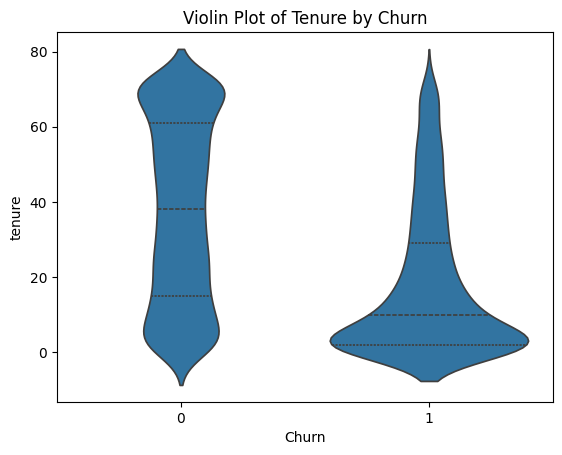

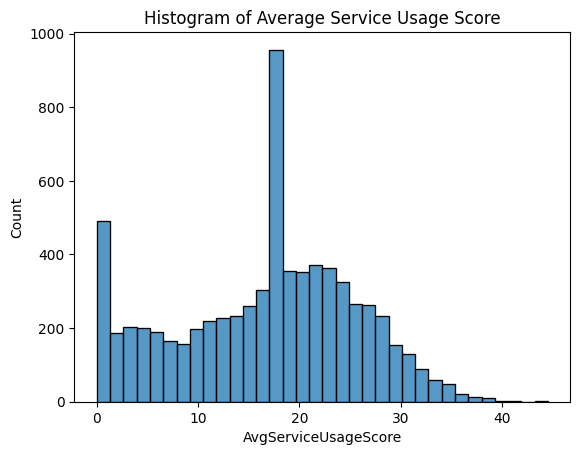

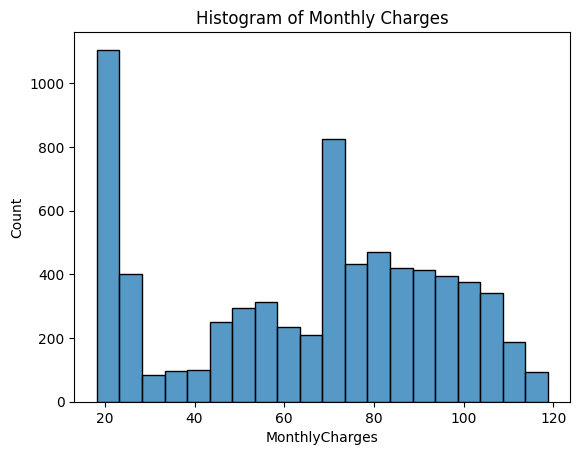

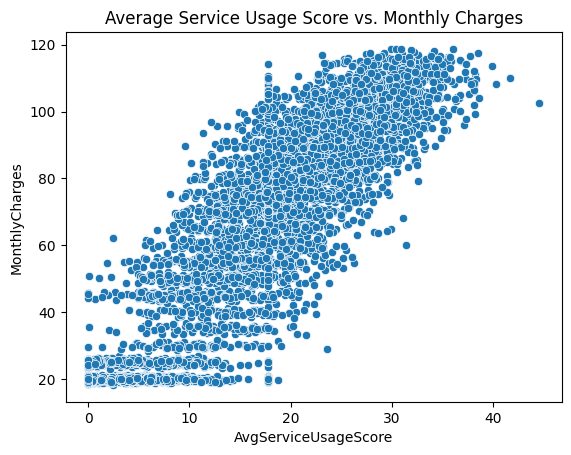

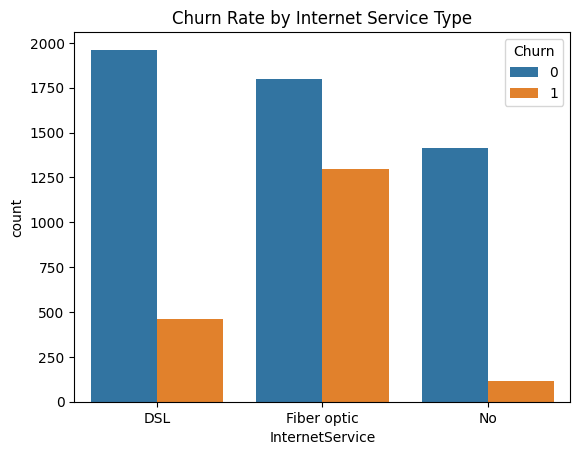

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summarize statistics
df.describe(include='all')

# Visualize distributions and relationships
plt.clf()
sns.violinplot(data=df, x='Churn', y='tenure', inner='quartile')
plt.title('Violin Plot of Tenure by Churn')
plt.show();

plt.clf()
sns.histplot(data=df, x='AvgServiceUsageScore')
plt.title('Histogram of Average Service Usage Score')
plt.show();

plt.clf()
sns.histplot(data=df, x='MonthlyCharges')
plt.title('Histogram of Monthly Charges')
plt.show();

plt.clf()
sns.scatterplot(data=df, x='AvgServiceUsageScore', y='MonthlyCharges')
plt.title('Average Service Usage Score vs. Monthly Charges')
plt.show();

plt.clf()
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Rate by Internet Service Type')
plt.show();

---

# Module 2: Supervised Learning for Business Decisions

## Walkthrough #3: Build a Regression Model for Pricing Optimization

### Split the data into training and validation sets

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['AvgServiceUsageScore']]  # predictor
y = df['MonthlyCharges']          # target

# Best practice when working with linear models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
  X_scaled, y, test_size=0.2, random_state=42
)

### Train a linear regression model

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"Intercept: {lr.intercept_:.2f}")
print(f"Coefficient (usage_scaled → price): {lr.coef_[0]:.2f}")

LinearRegression()

Intercept: 64.98
Coefficient (usage_scaled → price): 25.81


### Evaluate model performance on the validation set

In [10]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = lr.predict(X_val)

r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R-squared: 0.79
Mean Absolute Error: 8.09


---

## Walkthrough #4: Implement a Classification Model for Customer Churn

### Split the data into training and validation sets

In [11]:
# Select relevant features
features = ['tenure', 'SeniorCitizen', 'ServiceCount', 'InternetScore', 'AvgServiceUsageScore']
X = df[features]
y = df['Churn']

# Scaling is not as important for tree-based models since they are not sensitive to
# one feature having a larger scale than another

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Random Forest classification model

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate model performance on the validation set

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

cm = confusion_matrix(y_test, y_pred)

labels = ['No Churn', 'Churn']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print("\nConfusion Matrix (formatted):")
print(cm_df)

Accuracy: 0.78
Precision: 0.62
Recall: 0.46

Confusion Matrix (formatted):
          No Churn  Churn
No Churn       932    104
Churn          202    171


---

# Module 3: Unsupervised Learning and Pattern Discovery in Business

## Walkthrough #5: Exploring K-Means Clustering for Customer Segmentation

### Apply K-Means clustering to segment customers

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df['ContractType'] = df['Contract'].map({
    'Month-to-month': 0, 'One year': 1, 'Two year': 2
})
features = ['tenure', 'ServiceCount', 'AvgServiceUsageScore', 'MonthlyCharges', 'InternetScore', 'ContractType']


# Select relevant features
#features = ['tenure', 'SeniorCitizen', 'ServiceCount', 'AvgServiceUsageScore']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Determine the optimal number of clusters using the Elbow Method

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'Elbow Method for Optimal k')

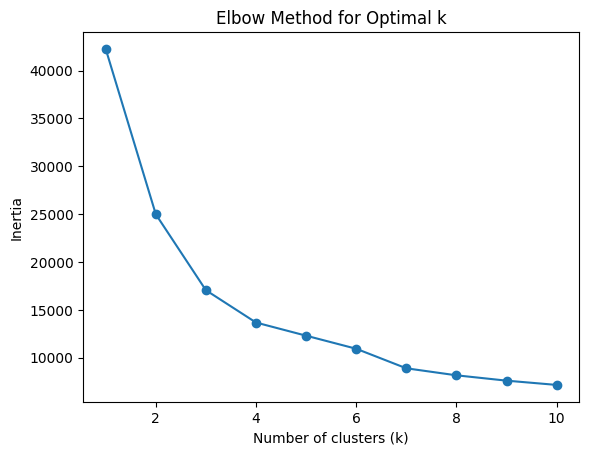

In [15]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.clf()
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Verify using the silhouette score (optional but recommended)

In [16]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette scores for k=3 to k=6
silhouette_scores = {}

for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score

silhouette_scores

{3: 0.3592992661590038,
 4: 0.3438312310743833,
 5: 0.31451852557829835,
 6: 0.2943776497495214}

In [17]:
# Let's assume the elbow suggested k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

### Visualize customer segments using a 2D plot

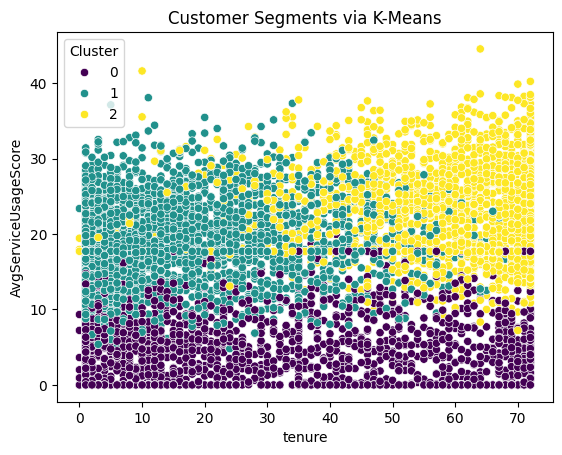

In [18]:
plt.clf()
# Visualize clusters in 2D space (using tenure and MonthlyCharges)
#sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis')
sns.scatterplot(data=df,  x='tenure', y='AvgServiceUsageScore', hue='Cluster', palette='viridis')
plt.title('Customer Segments via K-Means')
plt.show();

---

## Walkthrough #6: Market Basket Analysis with Apriori Algorithm

### Prepare transactional data (services as items)

In [19]:
# Selecting binary service columns to act like "products"
service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService'
]

# Convert service columns to boolean (preference of apriori() function)
df_basket = df[service_cols].astype(bool)
df_basket

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService
0,False,True,False,False,False,False,False
1,True,False,True,False,False,False,True
2,True,True,False,False,False,False,True
3,True,False,True,True,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
7038,True,False,True,True,True,True,True
7039,False,True,True,False,True,True,True
7040,True,False,False,False,False,False,False
7041,False,False,False,False,False,False,True


### Apply the Apriori algorithm to identify frequent itemsets

In [20]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_basket, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.286668,(OnlineSecurity)
1,0.344881,(OnlineBackup)
2,0.343888,(DeviceProtection)
3,0.290217,(TechSupport)
4,0.384353,(StreamingTV)
5,0.387903,(StreamingMovies)
6,0.903166,(PhoneService)
7,0.246486,"(OnlineSecurity, PhoneService)"
8,0.304132,"(OnlineBackup, PhoneService)"
9,0.222490,"(DeviceProtection, StreamingTV)"


### Generate association rules from frequent itemsets

In [21]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules

,antecedents,consequents,support,confidence,lift
0,(OnlineSecurity),(PhoneService),0.246486,0.859832,0.952019
1,(OnlineBackup),(PhoneService),0.304132,0.881844,0.976392
2,(DeviceProtection),(StreamingTV),0.222490,0.646986,1.683311
3,(DeviceProtection),(StreamingMovies),0.226466,0.658547,1.697710
4,(DeviceProtection),(PhoneService),0.300582,0.874071,0.967785
5,(TechSupport),(PhoneService),0.249184,0.858611,0.950667
6,(StreamingMovies),(StreamingTV),0.275451,0.710102,1.847526
7,(StreamingTV),(StreamingMovies),0.275451,0.716661,1.847526
8,(StreamingTV),(PhoneService),0.343888,0.894717,0.990645
9,(StreamingMovies),(PhoneService),0.345591,0.890922,0.986443


### Interpret insights

🔵 Key Metrics

Support:  
Fraction of all customers who have this combination of services.  
Example: 0.275 means 27.5% of customers bought that combination.

Confidence:  
Given the antecedent, how often does the consequent also occur?  
Example: Confidence of 0.71 means 71% of customers with the antecedent also have the consequent.  

Lift:  
Measures how much more likely the consequent is given the antecedent compared to random chance.

Lift > 1 → Positive association.   
Lift = 1 → Independent.  
Lift < 1 → Negative association. 

🧩 Interpretation of Key Rules. 
Rule 6. 
If customers have StreamingTV, they also likely have StreamingMovies

Confidence = 0.71. 
71% of customers who subscribe to StreamingTV also have StreamingMovies.

Lift = 1.84. 
This is 84% more likely than random → strong association.

📌 Business insight:  
These services are good cross-sell opportunities. A bundled "Entertainment Pack" could increase uptake.

Rule 2. 
If customers have DeviceProtection, they also likely have StreamingTV

Confidence = 0.65. 
65% of DeviceProtection users also subscribe to StreamingTV.

Lift = 1.68. 
This is a significant positive relationship, suggesting that people buying protection plans may also value entertainment services.

📌 Business insight:  
Consider cross-promoting entertainment bundles during device protection sales.

Rule 10. 
If customers have DeviceProtection + PhoneService, they likely also have StreamingMovies

Confidence = 0.67. 
67% of these bundled customers also purchase StreamingMovies.

Lift = 1.71. 
Shows a strong cross-sell relationship.

📌 Business insight:  
Customers with both DeviceProtection and PhoneService are strong candidates for targeted movie streaming promotions.

General pattern. 
StreamingTV ↔ StreamingMovies repeatedly show strong relationships with lift > 1.8.  
PhoneService often appears as a base product with high confidence but lower lift (~0.9) — this is expected since most customers (90%) already have PhoneService.

🔔 Summary.  
Look for high lift AND high confidence.  
Focus marketing on bundles like:  
  StreamingTV + StreamingMovies packages.  
  Upselling StreamingMovies to customers with DeviceProtection + PhoneService.

---

# Module 4: Implementing and Evaluating ML Models

## Walkthrough #7: Exploring Cross-Validation for Model Evaluation

### Split data into training and test sets

In [22]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[['AvgServiceUsageScore', 'tenure', 'MonthlyCharges']]
y = df['Churn']

# Scale the features since logistic regression is a linear model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train a classification model using logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

### Apply k-fold cross-validation to evaluate model performance

In [24]:
from sklearn.model_selection import cross_val_score, cross_validate

# Cross-validate with multiple metrics
cv_results = cross_validate(
    logreg, 
    X_train, 
    y_train, 
    cv=5, 
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

### Compare metrics across folds

In [25]:
# Average performance across folds
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    print(f"{metric.split('_')[1].capitalize()}: {cv_results[metric].mean():.3f} ± {cv_results[metric].std():.3f}")


Accuracy: 0.783 ± 0.011
Precision: 0.636 ± 0.031
Recall: 0.430 ± 0.036
F1: 0.512 ± 0.032


📝 Interpretation
Accuracy → Overall correctness of predictions

Precision → How many predicted churns were actual churns

Recall → How many churns were correctly identified

F1-Score → Balances precision & recall

Cross-validation ensures that your model generalizes better to unseen data by reducing the risk of overfitting on a single split.

---

## Walkthrough #8: Hyperparameter Tuning with Grid Search

### Train a Random Forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df[['AvgServiceUsageScore', 'tenure', 'MonthlyCharges']]
y = df['Churn']

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

### Apply grid search to find optimal hyperparameters

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Run grid search
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

### Evaluate model improvement using accuracy and recall

In [28]:
from sklearn.metrics import accuracy_score, recall_score

# Predict using the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X)

# Evaluate
print(f"Best Accuracy: {accuracy_score(y, y_pred):.3f}")
print(f"Best Recall: {recall_score(y, y_pred):.3f}")

Best Accuracy: 0.813
Best Recall: 0.483


### Interpret the best hyperparameter combination

In [29]:
print("Best Parameters Found:", grid_search.best_params_)

Best Parameters Found: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
